**Introducción:**

Microproyecto 2 Clustering, Sintomas Psiquiátricos

Integrantes del equipo 7:

* Wilson Andrés Ocampo Cárdenas

* Santiago Cano Vásquez

* Duberney Gutierrez Bacca

## Análisis de los Datos

In [ ]:
# Se importan las bibliotecas necesarias.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
#suprimir las advertencias futuras que pueden ser generadas por varias bibliotecas de Python, especialmente cuando estás utilizando funciones o características que se espera que cambien en futuras versiones de esas bibliotecas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#El código carga un conjunto de datos desde un archivo CSV, lo reorganiza aleatoriamente, y luego muestra estadísticas descriptivas sobre las columnas numéricas del DataFrame resultante
df = pd.read_csv("fifteen_clinicians.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,8.000000,15.500000,0.337778,0.182222,0.126667,0.417778,0.208889,0.475556,0.417778,0.197778,...,4.853333,4.080000,0.184444,6.751111,0.293333,6.335556,0.484444,5.813333,0.333333,5.924444
std,4.325302,8.665075,0.473479,0.386457,0.332969,0.493742,0.406967,0.499958,0.493742,0.398767,...,2.353181,2.245074,0.388278,2.170938,0.455797,2.333226,0.500314,2.145239,0.471929,2.069737
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,0.000000,5.000000,0.000000,4.000000,0.000000,5.000000
50%,8.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,4.000000,0.000000,7.000000,0.000000,7.000000,0.000000,6.000000,0.000000,6.000000
75%,12.000000,23.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,6.000000,0.000000,8.000000,1.000000,8.000000,1.000000,7.000000,1.000000,7.000000
max,15.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,1.000000,9.000000,1.000000,9.000000,1.000000,9.000000,1.000000,9.000000


Notamos que no hay datos faltantes ni atípicos, y por lo tanto no es necesario hacer un preprocesamiento. Haremos una estandarización de los datos con standard scaler.

In [ ]:
#El proceso de escalado estándar asegura que todas las características tengan una media de cero y una desviación estándar de uno
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns.values)

Debido a la naturaleza de los datos, las variables solo toman valores binarios o enteros en 0-9, elegir solo 3 variables no da información suficiente a la que se pueda hacer agrupación, por lo tanto vamos a intentar encontrar tendencias en los datos usando más variables, para poder quedar con solo tres haremos reducción de dimensionalidad con PCA. Las variables que usaremos serán la presencia de síntomas psiquiátricos (3-25) y aplicabilidad de desordenes (29,31,33,35).

In [ ]:
#Después de ejecutar este código, transformed contendrá tres nuevas variables que son una representación reducida de los datos originales en scaled_df.
#Estos tres componentes principales son una forma de resumir la información en tus datos en un espacio de menor dimensionalidad, lo que puede ser útil en análisis posteriores.
df0 = scaled_df.drop(['V1','V2','V26','V27','V28','V30','V32','V34','V36'],axis=1)
pca = PCA(n_components=3)
pca.fit(df0)

transformed = pd.DataFrame(pca.transform(df0))

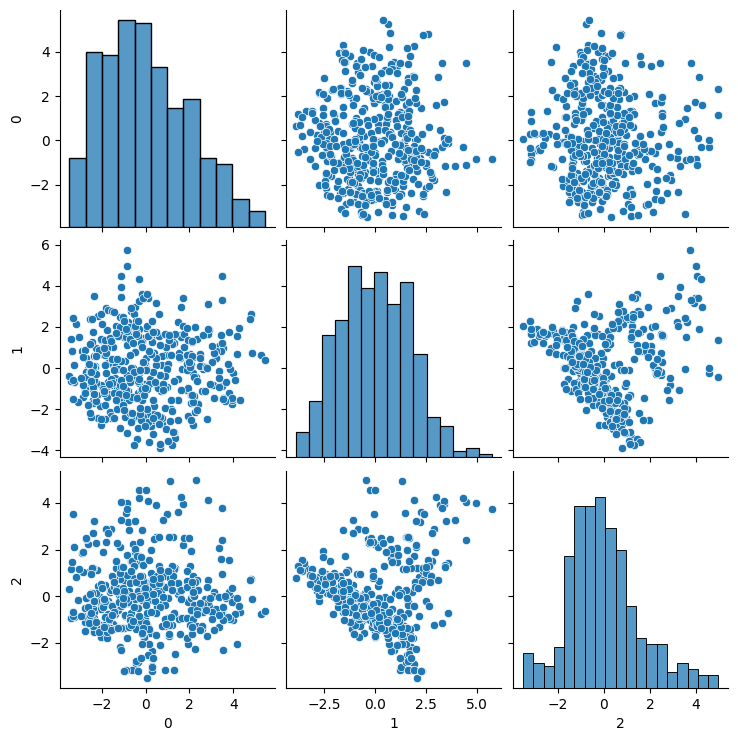

In [ ]:
sb.pairplot(transformed)

En el gráfico, verás una matriz de pequeñas imágenes:

En la diagonal principal, hay histogramas que muestran la distribución de cada una de las tres variables por separado.

Fuera de la diagonal principal, verás gráficos de dispersión que muestran cómo se relacionan dos de las tres variables entre sí. Cada punto en estos gráficos de dispersión representa un par de valores de las variables.

Este tipo de gráfico te ayuda a visualizar la relación y la distribución de las variables principales después de la reducción de dimensionalidad. Puede ser útil para identificar patrones o tendencias en tus datos.

In [ ]:
fig = px.scatter_3d(transformed,x=0,y=1,z=2)
fig.show()

Un gráfico 3D que representa los datos en función de las tres nuevas variables principales. Este tipo de gráfico es útil para visualizar la estructura de datos en un espacio de menor dimensionalidad después de aplicar técnicas como PCA.

## Numero de clusters

hacemos el análisis para encontrar el numero de clusters


### curva de codo

El método de la curva de codo usa la inercia, una medida de la suma del cuadrado de las distancias de las muestras al centrol de cluster más cercano, con la idea de minimizarla, es decir, hacer los clusters lo más parecidos posible, sin llegar a quedar con un cluster para cada muestra.

Un buen número de cluster será a partir del cual, aumentar el número de clusters no hace mejoras significativas a la inercia.

In [ ]:
def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(data)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('curva de codo')
  plt.show()

Valores:  [4112.594736436906, 2904.1595734956763, 2165.602487013971, 1577.0890590713607, 1280.8330698054751, 1118.7689740691496, 1012.8660978675581, 920.2587464509907, 823.9584456347623, 747.9114444558006, 690.0711438107437, 638.288914521509, 597.5558812156801, 561.6035166546544, 538.4445816773182]


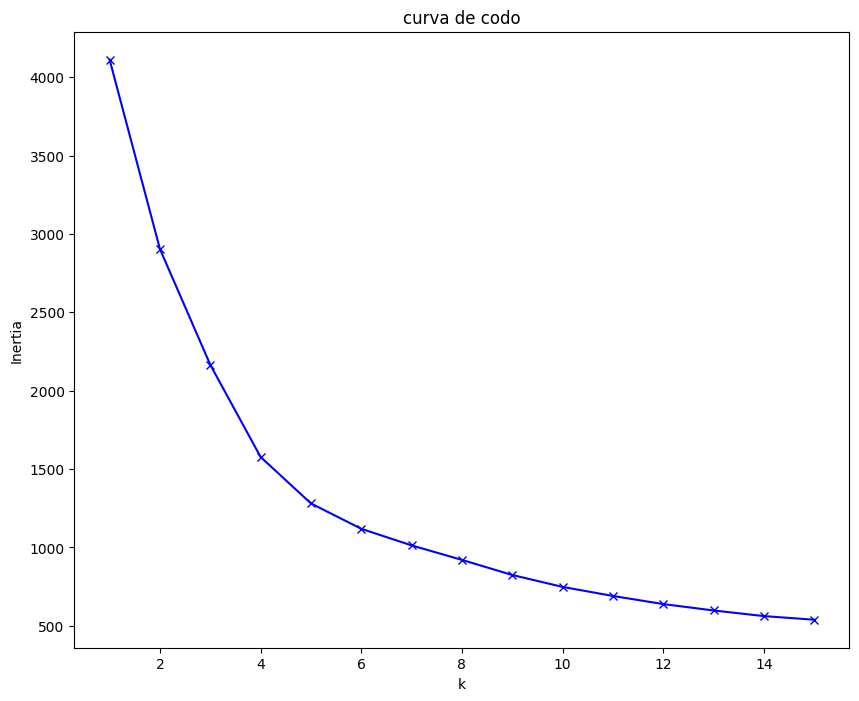

In [ ]:
tf_arr = transformed.to_numpy()
elbow_curve(tf_arr)

Se puede ver que a partir de 5 los cambios en la inercia se van volviendo más pequeños, indicando que 5 puede ser un candidato para k.

### Estadístico de gap

La idea de este método es comparar la variación intracluster para diferentes valores de k con su valor esperado dada una distribución de referencia, esta distribución de referencia será una generada con simulaciones montecarlo, es decir generando valores uniformemente en los rangos de las variables.

El valor estimado de k será el que maximize el estadístico de gap. Esto significa que la estructura de clusters está alejada de la distribución uniforme.

In [ ]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):

            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap

        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve
    # su respectivo número de clusters
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

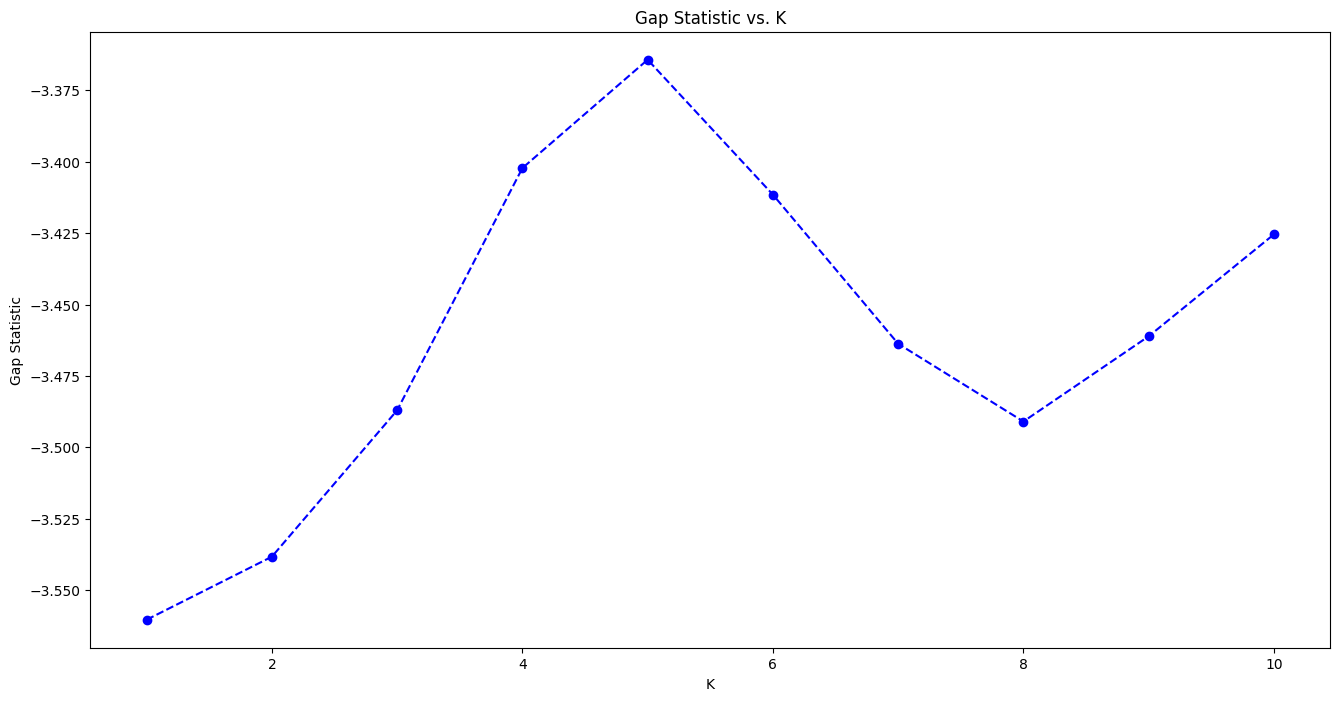

In [ ]:
#este código se utiliza para visualizar la estadística en función del número de clústeres (K)
#y ayudará a determinar el número óptimo de clústeres para los datos transformados mediante la métrica de la estadística.
k, gapdf = optimalK(transformed, nrefs=5, maxClusters=10)
plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
plt.show();

Claramente el estadístico de gap se maximiza en k=5. Por lo tanto es el k óptimo según el método de estadístico de gap, además es el mismo obtenido con el método de la curva de codo.

### Coeficiente de siluetas

Para cada muestra calcula que tan bien asignado es su cluster, es decir que tan similar es a los elementos del cluster.
La longitud en el eje x nos da que tan similares son los elementos del cluster, y la longitud en el eje y nos da el tamaño del cluster.

For n_clusters = 2 The average silhouette_score is : 0.29291822270231044
For n_clusters = 3 The average silhouette_score is : 0.3264518216149975
For n_clusters = 4 The average silhouette_score is : 0.3330286979514475
For n_clusters = 5 The average silhouette_score is : 0.32753588174782233
For n_clusters = 6 The average silhouette_score is : 0.33268288976748217


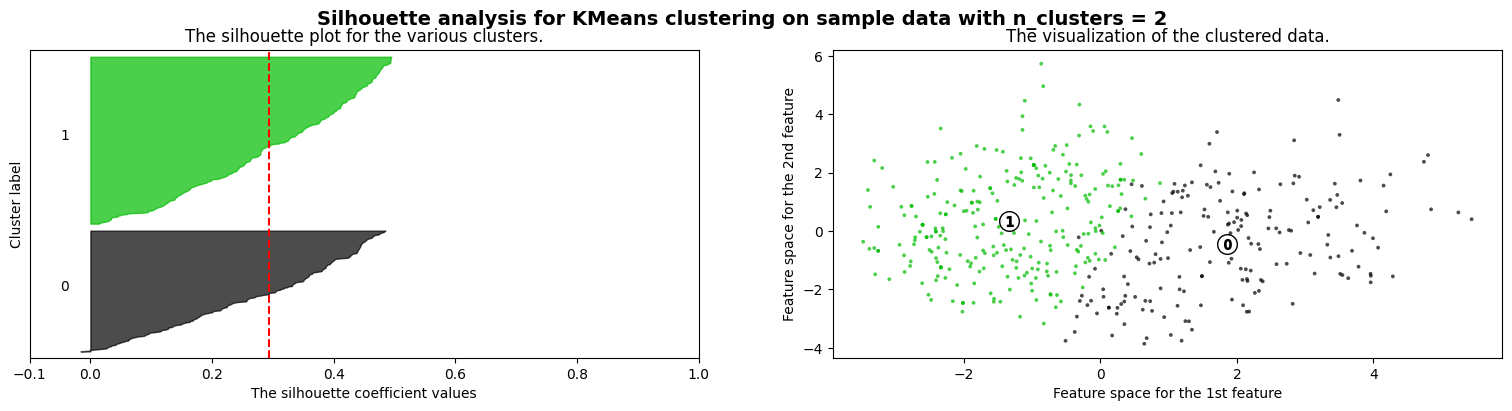

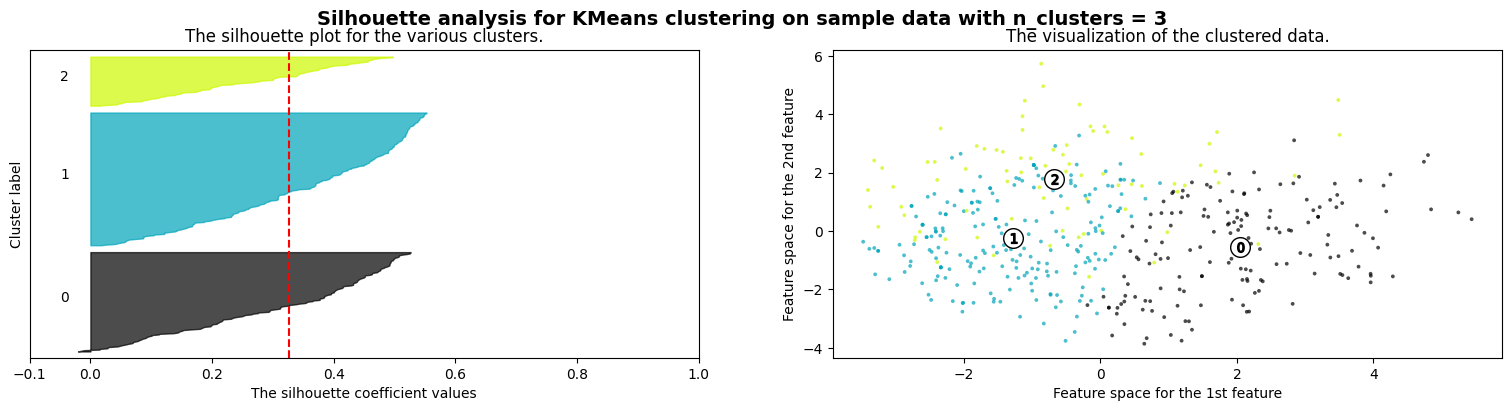

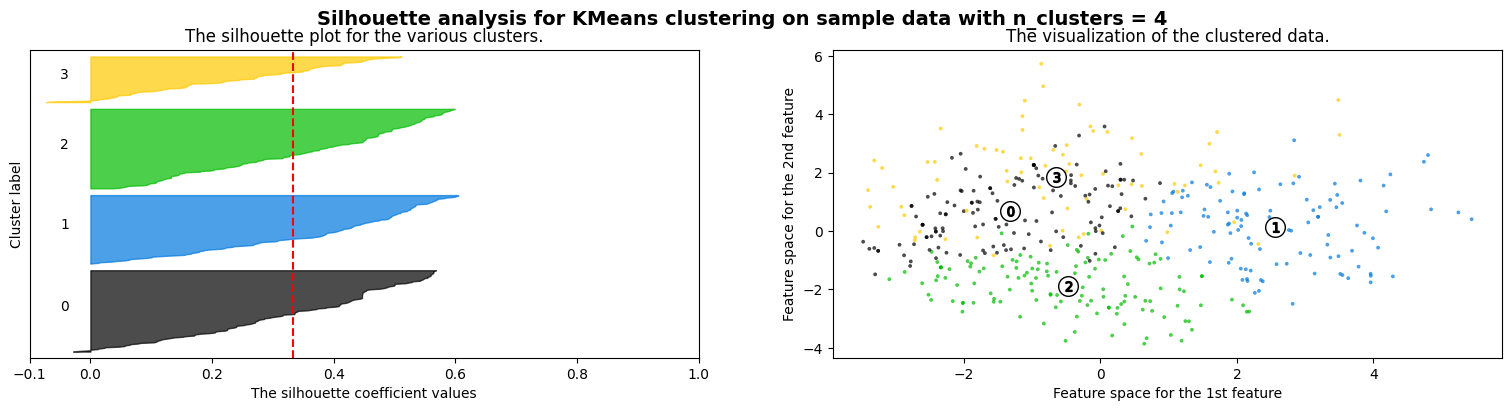

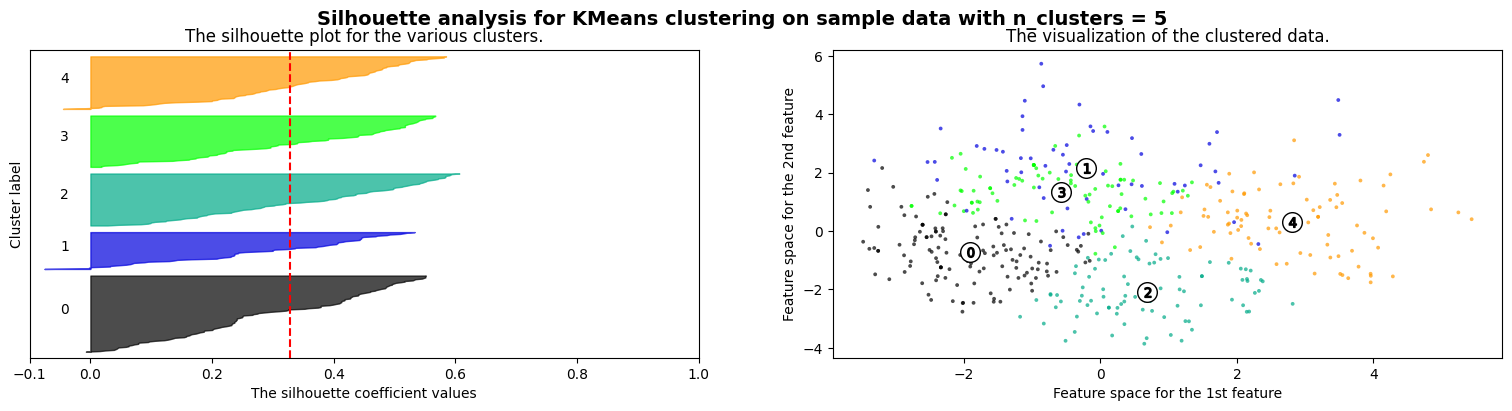

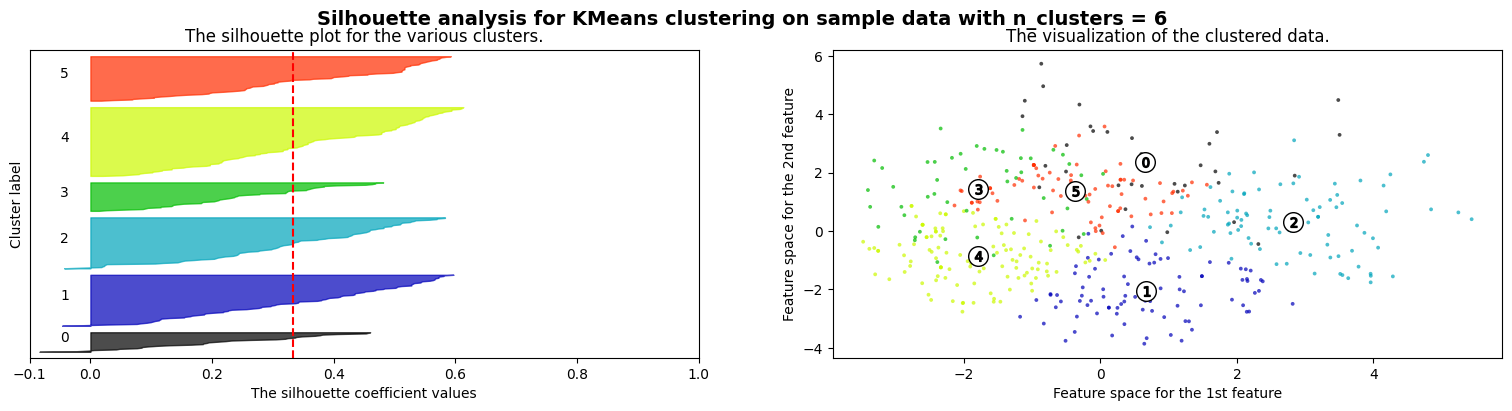

In [ ]:
colors_k_means = ['cyan','purple','orange']
range_n_clusters = [2, 3, 4, 5, 6]
X = np.array(transformed)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

notamos que para k=2,3,6 los tamaños de los clusters son muy diferentes, por lo tanto no son valores buenos para k. Entre k=4 y k=5 notamos que k=5 es un mejor valor para k, porque es el que tiene menor diferencia en el tamaño de los clusters, y el coeficiente de silueta es más similar entre todos los clusters.

### k-means

In [ ]:
#Este código te permite visualizar los datos transformados en un gráfico 3D con puntos de diferentes colores representando
#los diferentes clústeres a los que pertenecen los datos. Esto puede ayudar a identificar patrones de agrupación en los datos después de la aplicación de K-Means.
kmeans_model = KMeans(n_clusters=5).fit(transformed)
labels = kmeans_model.labels_

In [ ]:
tf_kmeans = transformed.copy()
tf_kmeans['cluster'] = labels

fig4 = px.scatter_3d(tf_kmeans,x=0,y=1,z=2,color='cluster')
fig4.show()

## Clustering aglomerativo

### Dendrograma

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

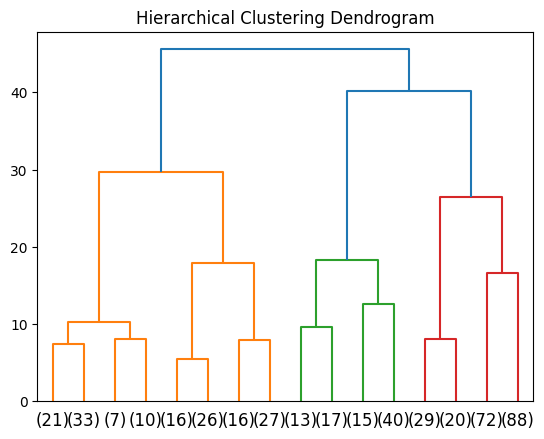

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

agg_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = agg_model.fit(tf_arr)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)

Según el dendrograma valores posibles para k son 3 y 5, pues son los que tienen más diferencia en la altura de las ramificaciones.

### Clustering aglomerativo

Haremos el clustering aglomerativo con k=5, debido a la información extraída del dendrograma y de los métodos trabajados con el k-means

In [ ]:
agg_model = AgglomerativeClustering(n_clusters=5).fit(tf_arr)

In [ ]:
tf_agg = transformed.copy()
tf_agg['cluster'] = agg_model.labels_

fig4 = px.scatter_3d(tf_agg,x=0,y=1,z=2,color='cluster')
fig4.show()

### Caracterización de los clusters

Intentaremos encontrar las características que definen los clusters

In [ ]:
df_agg = df.copy().drop(['V1','V2','V26','V27','V28','V30','V32','V34','V36'],axis=1)
df_agg['cluster'] = agg_model.labels_

In [ ]:
pd.set_option('display.max_columns', None)

#### Cluster 0

In [ ]:
cluster_0 = df_agg[df_agg['cluster'] == 0]
cluster_0.drop('cluster', axis=1).describe()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V29,V31,V33,V35
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.247059,0.129412,0.011765,0.352941,0.176471,0.341176,0.282353,0.141176,0.117647,0.764706,0.223529,0.282353,0.364706,0.423529,0.435294,0.117647,0.200000,0.152941,0.023529,0.282353,0.082353,0.329412,0.717647,0.894118,0.023529,0.411765,0.341176
std,0.433861,0.337647,0.108465,0.480721,0.383482,0.476918,0.452816,0.350270,0.324102,0.426700,0.419083,0.452816,0.484204,0.497050,0.498738,0.324102,0.402374,0.362067,0.152477,0.452816,0.276533,0.472789,0.452816,0.309513,0.152477,0.495074,0.476918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Notamos que este cluster tiene los valores más altos en las variables V12,V17 y V29, que corresponden a uso de narcóticos-drogas, abuso de alcohol y aplicabilidad de desorden de abuso de sustancias. Por lo tanto este cluster contiene las personas con problemas de adicción a drogas y alcohol.

#### Cluster 1

In [ ]:
cluster_1 = df_agg[df_agg['cluster'] == 1]
cluster_1.drop('cluster', axis=1).describe()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V29,V31,V33,V35
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.494118,0.258824,0.082353,0.658824,0.341176,0.811765,0.588235,0.364706,0.364706,0.023529,0.035294,0.811765,0.964706,0.917647,0.0,0.094118,0.176471,0.011765,0.282353,0.658824,0.152941,0.905882,0.941176,0.011765,0.317647,0.870588,0.458824
std,0.502933,0.440588,0.276533,0.476918,0.476918,0.393220,0.495074,0.484204,0.484204,0.152477,0.185617,0.393220,0.185617,0.276533,0.0,0.293725,0.383482,0.108465,0.452816,0.476918,0.362067,0.293725,0.236691,0.108465,0.468324,0.337647,0.501259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Este cluster tiene los valores más altos de V8, V15, V24 y V33, entonces este cluster contiene las personas que tienen presentan de depresión, aislamiento social, social blunting (incapacidad de expresar los sentimientos) y posiblemente desorden depresivo-afectivo.

#### Cluster 2

In [ ]:
cluster_2 = df_agg[df_agg['cluster'] == 2]
cluster_2.drop('cluster', axis=1).describe()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V29,V31,V33,V35
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000,160.000000,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000,160.000000,160.000000
mean,0.168750,0.156250,0.031250,0.212500,0.200000,0.693750,0.606250,0.275000,0.281250,0.031250,0.018750,0.106250,0.406250,0.393750,0.0,0.043750,0.056250,0.0,0.056250,0.181250,0.100000,0.212500,0.625000,0.0,0.087500,0.625000,0.475000
std,0.375707,0.364232,0.174539,0.410361,0.401256,0.462382,0.490115,0.447916,0.451021,0.174539,0.136067,0.309125,0.492674,0.490115,0.0,0.205181,0.231127,0.0,0.231127,0.386435,0.300942,0.410361,0.485643,0.0,0.283454,0.485643,0.500943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


Contiene los valores más altos para V9 -ansiedad- y V35 -posible trastorno de ansiedad-. También tiene alta presencia de V8 -depresión- y V33 -posible trastorno depresivo-afectivo-, pero a diferencia del cluster 1 no tiene valores altos de V15 -aislamiento social- y V24-incapacidad de expresar los sentimientos-.

#### Cluster 3

In [ ]:
cluster_3 = df_agg[df_agg['cluster'] == 3]
cluster_3.drop('cluster', axis=1).describe()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V29,V31,V33,V35
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,0.690141,0.239437,0.253521,0.690141,0.169014,0.056338,0.154930,0.014085,0.183099,0.056338,0.154930,0.521127,0.788732,0.802817,0.028169,0.366197,0.535211,0.098592,0.197183,0.352113,0.267606,0.830986,0.943662,0.070423,0.887324,0.084507,0.070423
std,0.465727,0.429777,0.438123,0.465727,0.377432,0.232214,0.364413,0.118678,0.389500,0.232214,0.364413,0.503109,0.411113,0.400704,0.166633,0.485193,0.502309,0.300235,0.400704,0.481028,0.445862,0.377432,0.232214,0.257679,0.318447,0.280126,0.257679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Este cluster tiene los valores más altos de V3 -desorganización del lenguaje-, V6 -comportamiento inapropiado-, V19 -negación de la enfermedad-,V25 -incapacidad en actividades diarias- y V31 -posible desorden esquizofrenico, además tienen valores altos en V15 -aislamiento social-.



#### Cluster 4

In [ ]:
cluster_4 = df_agg[df_agg['cluster'] == 4]
cluster_4.drop('cluster', axis=1).describe()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V29,V31,V33,V35
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.265306,0.142857,0.530612,0.387755,0.122449,0.020408,0.122449,0.020408,0.102041,0.020408,0.081633,0.040816,0.102041,0.122449,0.0,0.081633,0.122449,0.020408,0.183673,0.061224,0.163265,0.020408,0.326531,0.020408,0.530612,0.061224,0.020408
std,0.446071,0.353553,0.504234,0.492287,0.331201,0.142857,0.331201,0.142857,0.305839,0.142857,0.276642,0.199915,0.305839,0.331201,0.0,0.276642,0.331201,0.142857,0.391230,0.242226,0.373438,0.142857,0.473804,0.142857,0.504234,0.242226,0.142857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como el cluster anterior tambien tiene valores altos en V31 -posible desorden esquizofrenico- pero además tiene el valor más alto en V5 -alucinaciones-, a diferencia del cluster 4 no hay una presencia marcada de V15 -aislamiento social- y V19 -negación de la enfermedad-.

# ***`Solución`***

---




****1) Explique si tuvo que realizar algún tipo de pre-procesamiento en el archivo cvs.****

Para la la base de datos asignada, no fue necesario realizar un pre.procesamiento de datos en el archivo cvs.


---



**2) Explique la(s) técnica(s) utilizada(s) para establecer el número de clústers para cada archivo.**

 * a. Curva de codo: Se puede ver que a partir de 5 les cambios en la inercia se van volviendo más pequeños, indicando que 5 puede ser un candidato para k.

 * b. Estadístico de gap: Claramente el estadístico de gap se maximiza en k=5. Por lo tanto es el k óptimo según el método de estadístico de gap, además es el mismo obtenido con el método de la curva de codo.

 * c. Análisis de Silueta: notamos que para k=2,3,6 los tamaños de los clusters son muy diferentes, por lo tanto no son valores buenos para k. Entre k=4 y k=5 notamos que k=5 es un mejor valor para k, porque es el que tiene menor diferencia en el tamaño de los clusters, y el coeficiente de silueta es más similar entre todos los clusters.


---


 **3. Las características más representativas de cada uno de los clusters fueron:**


 * Cluster 0: Notamos que este cluster tiene los valores más altos en las variables V12,V17 y V29, que corresponden a uso de narcóticos-drogas, abuso de alcohol y aplicabilidad de desorden de abuso de sustancias. Por lo tanto este cluster contiene las personas con problemas de adicción a drogas y alcohol.


 * Cluster 1: Este cluster tiene los valores más altos de V8, V15, V24 y V33, entonces este cluster contiene las personas que tienen presentan de depresión, aislamiento social, social blunting (incapacidad de expresar los sentimientos) y posiblemente desorden depresivo-afectivo.

 * Cluster 2: Contiene los valores más altos para V9 -ansiedad- y V35 -posible trastorno de ansiedad-. También tiene alta presencia de V8 -depresión- y V33 -posible trastorno depresivo-afectivo-, pero a diferencia del cluster 1 no tiene valores altos de V15 -aislamiento social- y V24-incapacidad de expresar los sentimientos.


 * Cluster 3:Este cluster tiene los valores más altos de V3 -desorganización del lenguaje-, V6 -comportamiento inapropiado-, V19 -negación de la enfermedad-,V25 -incapacidad en actividades diarias- y V31 -posible desorden esquizofrenico, además tienen valores altos en V15 -aislamiento social-.


 * Cluster 4: Como el cluster anterior tambien tiene valores altos en V31 -posible desorden esquizofrenico- pero además tiene el valor más alto en V5 -alucinaciones-, a diferencia del cluster 4 no hay una presencia marcada de V15 -aislamiento social- y V19 -negación de la enfermedad-.


---



**4. Realizar un agrupamiento jerárquico de los datos a través de un dendograma, donde se visualicen los clústeres del dataset entregado.**

Según el dendrograma valores posibles para k son 3 y 5, pues son los que tienen más diferencia en la altura de las ramificaciones.



---








**5. A partir del análisis de resultados describa 5 tendencias encontradas en los datos.**  En el caso que tenga a Colombia dentro de alguno de los grupos ¿qué se puede concluir?


**Tendencias encontradas en el análisis de los datos:**

 * El análisis de los síntomas psiquiátricos en los clusters 0 y 1 sugiere una posible correlación entre estos síntomas. Esta correlación podría deberse a la dificultad de los pacientes para expresar lo que sienten y a su búsqueda de una especie de "analgésico" emocional que les ayude a sobrellevar estos límites o malestares emocionales.

 Para profundizar en esta correlación, sería necesario realizar un análisis más detallado de los datos y, posiblemente, llevar a cabo pruebas estadísticas para evaluar la fuerza y la naturaleza de esta relación entre los síntomas.

 La identificación de correlaciones entre síntomas psiquiátricos es relevante en la comprensión de los patrones clínicos y puede influir en la toma de decisiones en el tratamiento de pacientes con trastornos mentales. Sin embargo, es fundamental realizar un análisis más exhaustivo y contar con una interpretación clínica adecuada para obtener conclusiones sólidas y significativas.

 * El Cluster 1 y el Cluster 4 pueden ser desencadenantes de síntomas psiquiátricos en un paciente, aunque desde perspectivas diferentes. El Cluster 1 se enfoca en cómo una persona se comportaría en sus interacciones con los demás, lo que influye en la manifestación de síntomas emocionales hacia su entorno. Por otro lado, el Cluster 4 sugiere lo que el paciente está experimentando internamente o posiblemente imaginando en su mente, centrándose en síntomas más internos como las alucinaciones. Estas dos perspectivas ofrecen información valiosa sobre la dinámica de los síntomas psiquiátricos, revelando cómo se expresan tanto en el ámbito de las relaciones sociales como en la experiencia subjetiva del individuo, lo que puede ser relevante para una comprensión más profunda y un tratamiento efectivo.

 * El análisis del Cluster 2 proporciona una visión profunda del comportamiento de los pacientes, revelando la posible coexistencia de una variedad de síntomas psiquiátricos. Entre estos síntomas destacan la ansiedad, el trastorno de ansiedad, la depresión y el trastorno depresivo-afectivo. Estos trastornos suelen estar relacionados con experiencias emocionales intensas en la vida de los pacientes. En algunas situaciones, la mente puede actuar como mecanismo de defensa, bloqueando o reprimiendo recuerdos traumáticos. Esto puede dejar a los pacientes emocionalmente vulnerables, y en tal estado, cualquier síntoma adicional puede desencadenar una respuesta, generando inseguridad o incluso manifestándose en comportamientos violentos. Este análisis subraya la complejidad de los trastornos psiquiátricos y resalta la importancia de abordar tanto los síntomas actuales como las experiencias pasadas al proporcionar tratamiento y apoyo a los pacientes, reconociendo la necesidad de considerar el contexto psicológico y emocional en el que se manifiestan los síntomas.


 * El Cluster 4 se distingue por mostrar valores significativamente elevados en la variable relacionada con el posible trastorno esquizofrénico y, de manera sobresaliente, revela el valor más alto en la variable asociada a las alucinaciones. Esta observación sugiere una fuerte correlación con la esquizofrenia, un trastorno psiquiátrico caracterizado por la presencia de síntomas psicóticos, en particular, las alucinaciones.

  Las alucinaciones representan experiencias perceptuales que se manifiestan sin la existencia de un estímulo externo y pueden manifestarse en distintos sentidos, como la audición, la visión o el tacto. La preeminencia de las alucinaciones en este cluster indica un posible componente psicótico distintivo, lo cual es un elemento esencial de la esquizofrenia. Este hallazgo es fundamental para un diagnóstico clínico preciso y para la implementación de enfoques de tratamiento específicos en el abordaje de trastornos psicóticos, incluida la esquizofrenia.

 * El análisis de los Clusters 2 y 4 sugiere una tendencia en la manifestación de síntomas psiquiátricos que podría indicar una posible diferenciación en los trastornos mentales. Ambos clusters presentan una alta presencia de ansiedad, síntomas depresivos y la posibilidad de trastornos relacionados con el estado de ánimo. Sin embargo, el Cluster 2 no muestra un aislamiento social marcado ni dificultades en la expresión de los sentimientos, mientras que el Cluster 4 se destaca por una fuerte correlación con la posibilidad de un desorden esquizofrénico, en particular, alucinaciones.

 Esta tendencia sugiere que los síntomas de ansiedad y depresión pueden coexistir en diversos trastornos, pero la presencia o ausencia de aislamiento social, negación de la enfermedad y alucinaciones puede diferenciar subgrupos dentro de esta población. Esta observación puede ser relevante para la identificación de subtipos de trastornos mentales y para el diseño de intervenciones clínicas más específicas y efectivas, adaptadas a las necesidades particulares de cada grupo de pacientes.



---



# **Conclusiones**



1. Los pacientes con problemas de salud mental no son todos iguales; se pueden agrupar en diferentes categorías según sus síntomas.

2. Los problemas de salud mental, como la ansiedad y la depresión, pueden mezclarse y presentarse de formas variadas.

3. La presencia de alucinaciones en algunos pacientes puede indicar un tipo específico de problema de salud mental, como la esquizofrenia.

4. Las experiencias personales y emocionales pasadas de los pacientes son muy importantes para entender cómo aparecen sus síntomas.

5. Identificar patrones y grupos de pacientes nos ayuda a ofrecer tratamientos más personalizados, lo que puede ser muy beneficioso para su bienestar.

6. Las técnicas de agrupamiento ayudan a encontrar grupos importantes en nuestros datos para entender mejor cómo están relacionados los elementos.

7. Elegir dónde empezar en K-Means es crucial ya que puede afectar los resultados.

8. K-Means funciona rápido y bien con grandes cantidades de datos, por lo que es útil en situaciones del mundo real.

9. A veces, entender qué significan los grupos encontrados puede ser subjetivo y requerir la opinión de un experto.

10. Estas técnicas se utilizan en muchas áreas, como para clasificar clientes, organizar documentos, estudiar genética y detectar comportamientos extraños, por lo que son versátiles y útiles en una amplia variedad de problemas.




